The MIT License (MIT)<br>
Copyright (c) 2017 Massachusetts Institute of Technology

Author: Evan Wojciechowski, Cody Rude, and Victor Pankratius<br>
This software is part of the NASA and NSF Projects (PI: V. Pankratius)

Permission is hereby granted, free of charge, to any person obtaining a copy<br>
of this software and associated documentation files (the "Software"), to deal<br>
in the Software without restriction, including without limitation the rights<br>
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell<br>
copies of the Software, and to permit persons to whom the Software is<br>
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in<br>
all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR<br>
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,<br>
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE<br>
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER<br>
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,<br>
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN<br>
THE SOFTWARE.
<hr>

# Visualizing Time Series Periodicities in Spiral Plots

This is a demonstration of how to use exploratory visualization in Scikit Discovery. It shows how to use the spiral plot to detect periodicity in Kepler light curve data. The spiral visualization is based on http://dx.doi.org/10.1109/INFVIS.2001.963273

In [1]:
from skdiscovery.visualization import spiral_plot

In [2]:
from skdaccess.framework.param_class import *
from skdaccess.astro.kepler import DataFetcher as Kepler_DF
from skdaccess.utilities.kepler_util import normalize

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
kepler_fetcher = Kepler_DF([AutoList(['009941662'])])
kepler_data    = kepler_fetcher.output().get()

In [5]:
normalize(kepler_data['009941662'])

In [6]:
kepler_flux = kepler_data['009941662'].iloc[:10000]
kepler_flux.set_index('TIME',inplace=True)

This spiral plot visualizes the light curve data wrapped using the (known) period of 1.7636 days. The colorbar indiciates the relative flux from star-planet system.

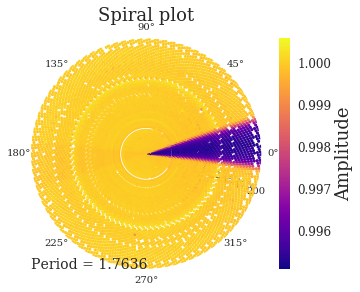

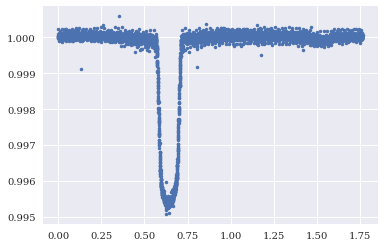

In [7]:
spiral_plot.run_spiral(kepler_flux['PDCSAP_FLUX'], period = 1.7636,plotTS=True)

As illustrated above, if there is periodicity in the data with a given period, the spiral plot will show a contigious slice of color which indicates the fraction of time that the transit event occurs.

Below, assume the periodicity is uknown. Drag the slider to experiment with different hypothesized periodicities and explore how the spiral plot and the time series plot change.

In [8]:
spiral_plot.run_spiralInteractive(kepler_flux['PDCSAP_FLUX'],1.7,[1.75,1.77,0.001],plotTS=True)